## Линейная регрессия

![scikit-learn logo](pics/OLS.png)

Обучение с учителем, предсказывает непрерывные величины (например: вес~рост, зарплата~образование, стоимость дома~кличество комнат)

Линейная регрессия представляет собой линейную (по коэффициентам) модель. 

Другими словами это суммирование значений признаков с некоторыми коэффициентами (весами).

$$\hat{y}(x)=w_0 + \sum_{i=1}^{d}w_ix_i$$

$$\hat{y}(x)=w_0+\langle w,x \rangle$$

$$\hat{y}(x)=Xw$$


Параметры модели, которые нужно обучать - коэффициенты $w_i, \ i=0,...,d$. Вес $w_0$ - bias.

### Обучение модели

Для обучения модели необходимо понять, как находить веса $w_i$. 

Инитуиция: веса должны быть наилучшего качества (модель должна давать наиболее точный прогноз)

### Функция ошибок

Функционал качества в задачах обучения с учителем обычно задается в виде суммы по объектам выборки:
$$Q(\hat{y}) = \frac 1 \ell \sum_{i=1}^\ell L(y_i, \hat{y}(x_i)),$$
где $L(\cdot, \cdot)$ - функция потерь, задающая штраф за разницу между предсказанием и истинным значением целевого признака. Свойства функции потерь:
* $L(y_i, \hat{y}(x_i)) \geqslant 0$;
* $L(y_i, y_i) = 0$. 

Основная задача функции ошибок: оценить насколько далеко прогнозное значение ($\hat{y}$) отклоняется от реального ($y$).

Ниже приведены различные функции, которые используются в разных ситуациях.

Наиболее часто используется MSE (среднеквадратичная ошибка)
$$MSE(y, \hat{y}) =\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2$$

Отличие от MSE в том, что в MSE плохо интерпретируется (попугаи в квадрате вместо обычных попугаев). Поэтому часто используют RMSE.
$$RMSE(y, \hat{y}) =\sqrt{\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2}$$

Но RMSE тоже имеет недостатки. Например, 10 попугаев это много? Для 1 хозяина - да, а для птицефабрики? 

Поэтому предлагается использовать относительную меру ошибки $R^2$ 
$$R^2(y, \hat{y}) = 1 - \frac{N\times MSE}{\sum_{i=1}^{N}{(y_i - \bar{y})^2}}$$

Вместо квадрата можно использовать модуль, такая функция потерь менее чувствительна к выбросам.
$$MAE(y, \hat{y}) =\frac{1}{N} \sum_{i=1}^{N}|y_i - \hat{y_i}|$$

Посомтрим как штраф за оишбки отличается для MAE и MSE. Видно, что за сильные ошибки MSE штрафует сильнее.

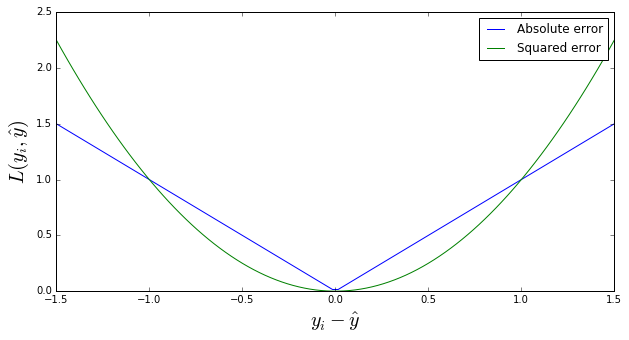

In [63]:
x = np.linspace(-1.5, 1.5, 100)
mse_loss = x ** 2
mae_loss = np.abs(x)
plt.figure(figsize=(10,5))
plt.plot(x, mae_loss, label="Absolute error")
plt.plot(x, mse_loss, label="Squared error")
plt.xlabel("$y_i - \hat{y}$", fontsize=20)
plt.ylabel("$L(y_i, \hat{y})$", fontsize=20)
plt.legend()

Для обучения чаще всего используется среднеквадратичная ошибка (MSE). 

##### Пример

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

%matplotlib inline

X = np.vstack((np.arange(20), np.random.rand(20))).T
X[:,1] = X[:,1]*X[:,0]
Y = X
Y = np.vstack((Y[:-2,:], np.array([[20, 100], [19, 90]])))

def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])  
    lr = LR()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1]) 
    grid = np.linspace(0, 20, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)  
    
def scatter_points_and_plot_line_MAE(X_subset):
    mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
    res = mod.fit(q=0.5)
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    grid = np.linspace(0, 20, 100)
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
    return mod, res

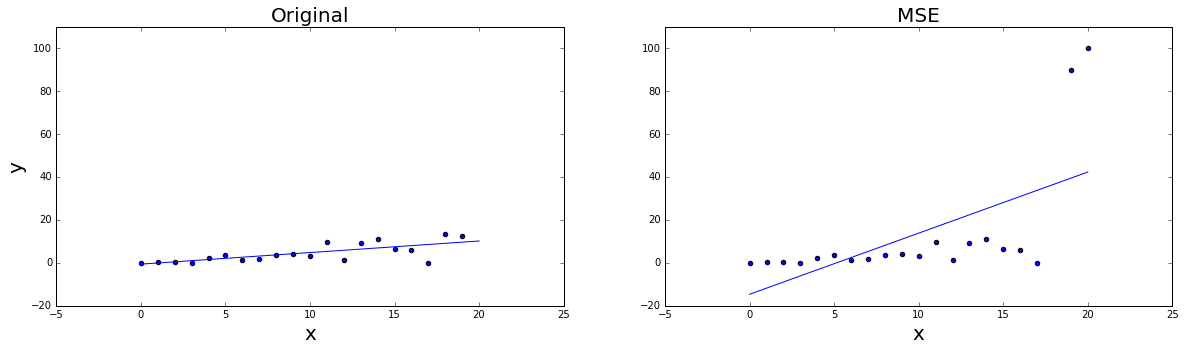

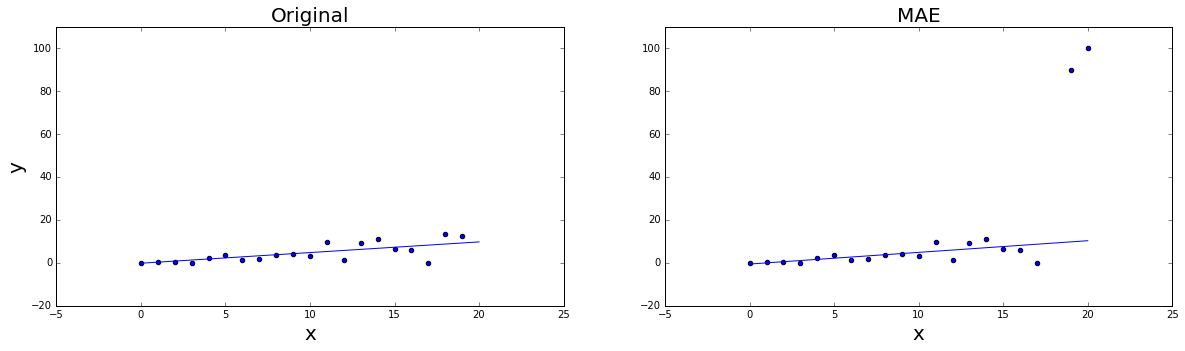

In [71]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.title('Original', fontsize=20)
plt.ylim(-20, 110)
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(Y)
plt.ylim(-20, 110)
plt.xlabel("x", fontsize=20)
plt.title('MSE', fontsize=20)



plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MAE(X)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.title('Original', fontsize=20)

plt.ylim(-20, 110)
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MAE(Y)
plt.ylim(-20, 110)
plt.xlabel("x", fontsize=20)
plt.title('MAE', fontsize=20)


### Градиентный спуск

Явный вид для вычисления параметров линейной регресии. 
$$Xw = Y$$

$$X^TXw=X^TY$$

$$w = (X^TX)^{-1}X^Ty.$$

Операция обращения матрицы очень затратна. Если матрица плохо определена, что решения такой системы могут сильно меняться при небольших зашумлениях:

![scikit-learn logo](pics/ill.png)

Поэтому на практике используется метод градиентного спуска.

$$w^{(k+1)} = w^{(k)} - \eta_k \nabla Q(w^{(k)}),$$
где $\eta_k$ — шаг градиентного спуска.

Формула градиента функции ошибки выглядит следующим образом:

$$\nabla Q(w) = -2X^Ty + 2X^TXw = 2X^T(Xw - y).$$

![scikit-learn logo](pics/gradient.png)

### Одна из основных проблем машинного обучения - переобучение

Чтобы справиться с переобучением применяются разные техники как на уровне данных (сэмплирование, сжатие размерности, ...), так и на уровне моделей (регуляризации)

$$MSE_{L1}(y, \hat{y}) =\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + \lambda  \sum_{k=0}^{M}|
w_k|$$

$$MSE_{L_2}(y, \hat{y}) =\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + \lambda  \sum_{k=0}^{M}
w_k^2$$

![scikit-learn logo](pics/regularization.png)

## Линейная регрессия библиотечными функциями

Наиболее часто на практике применяются следующие виды линейных регресиий:

* [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) — обычная линейная регрессия с функционалом MSE, при этом оптимизационная задача в этой реализации решается аналитически; 
* [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) — линейная регрессия с L1-регуляризованным функционалом MSE;
* [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) — линейная регрессия с L2-регуляризованным функционалом MSE.

Для использования других функционалов ошибки можно использовать [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [57]:
X = np.random.rand(10000, 1000)
X = np.hstack((X, np.ones(10000).reshape(-1,1)))
Y = np.sum(2*X, axis=1) + np.random.normal(0, 10, (10000, ))

"Честное" решение системы

In [80]:
%%time
# средствами numpy
res = np.linalg.lstsq(X,Y)

Wall time: 1.04 s


In [85]:
%%time
lr = LinearRegression()
lr.fit(X,Y)

Wall time: 1.23 s


Итерационный мтеод градиентного спуска

In [82]:
%%time

lr = Ridge(alpha=0.0, solver='sparse_cg')
lr.fit(X,Y)
print('R2: %f' % lr.score(X,Y))

R2: 0.790973
Wall time: 224 ms


#### Пример реальной жизненной задачи

In [3]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import pandas as pd

In [4]:
demo_dataset = pd.read_excel('.\data\Concrete_Data.xls')

In [5]:
demo_dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


Распределение целевой переменной

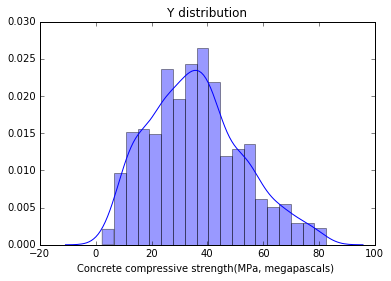

In [172]:
sns.distplot(demo_dataset['Concrete compressive strength(MPa, megapascals) '])
plt.title('Y distribution')

Корреляционная матрица

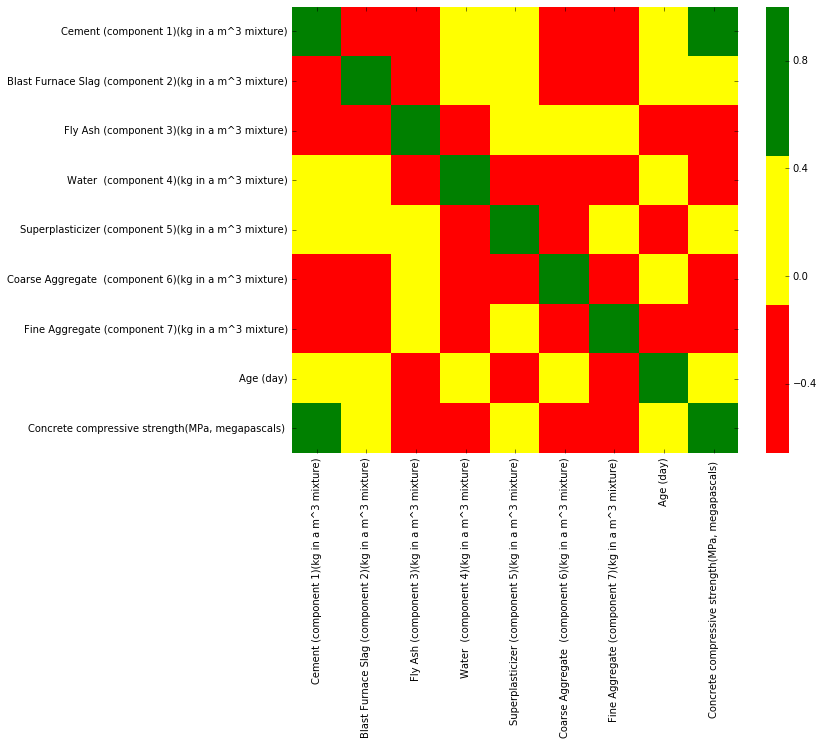

In [173]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(demo_dataset.corr(), ax=ax, cmap=ListedColormap(['red', 'yellow', 'green']))

Зададим X и Y

In [207]:
Y = demo_dataset['Concrete compressive strength(MPa, megapascals) ']
X = demo_dataset.copy()
X.drop('Concrete compressive strength(MPa, megapascals) ', axis=1, inplace=True)

В матрцие X порядок переменных может арьироваться от большого к маленькому. 

In [208]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


Чтобы с этим справиться, можно нормальизовать переменные. 

Самый популярный и просто способ нормализации - вычитание среднего из каждого признака и деление на стандартное отклонение (StandardScaler в sklearn). 

Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (MinMaxScaler в sklearn).

In [209]:
normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X)
X = pd.DataFrame(data=X_real_norm_np, columns=X.columns)

In [210]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264


Посчитаем модели с разными регуляризациями и сарвним коэффициенты

In [211]:
lr = LinearRegression()
lr.fit(X,Y)
lr.coef_
print('R2: %f' % lr.score(X,Y))


R2: 0.615465


In [212]:
lr2 = Ridge(alpha=0.5, solver='sparse_cg')
lr2.fit(X,Y)
lr2.coef_
print('R2: %f' % lr2.score(X,Y))


R2: 0.614777


In [213]:
lr1 = Lasso(alpha=0.5)
lr1.fit(X,Y)
print('R2: %f' % lr1.score(X,Y))


R2: 0.454902


Сравним получившиеся коэффициенты

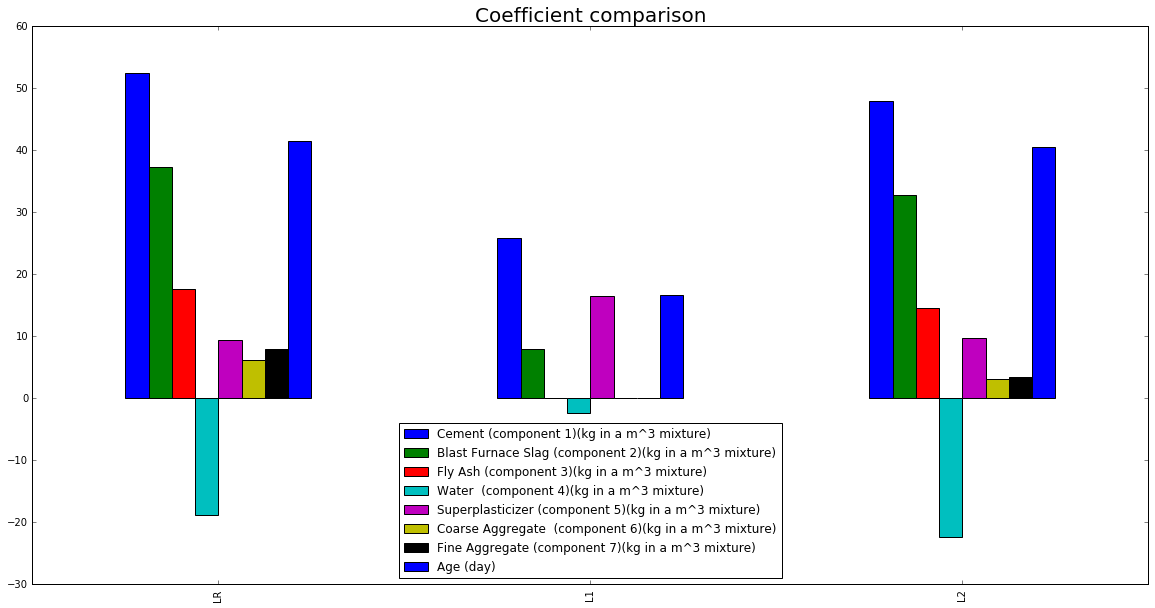

In [214]:
pd.DataFrame(np.vstack((
        lr.coef_,
        lr1.coef_,
        lr2.coef_
        )), index=['LR', 'L1', 'L2'], columns=X.columns).plot(kind='bar', figsize=(20,10))
plt.title('Coefficient comparison', fontsize=20)

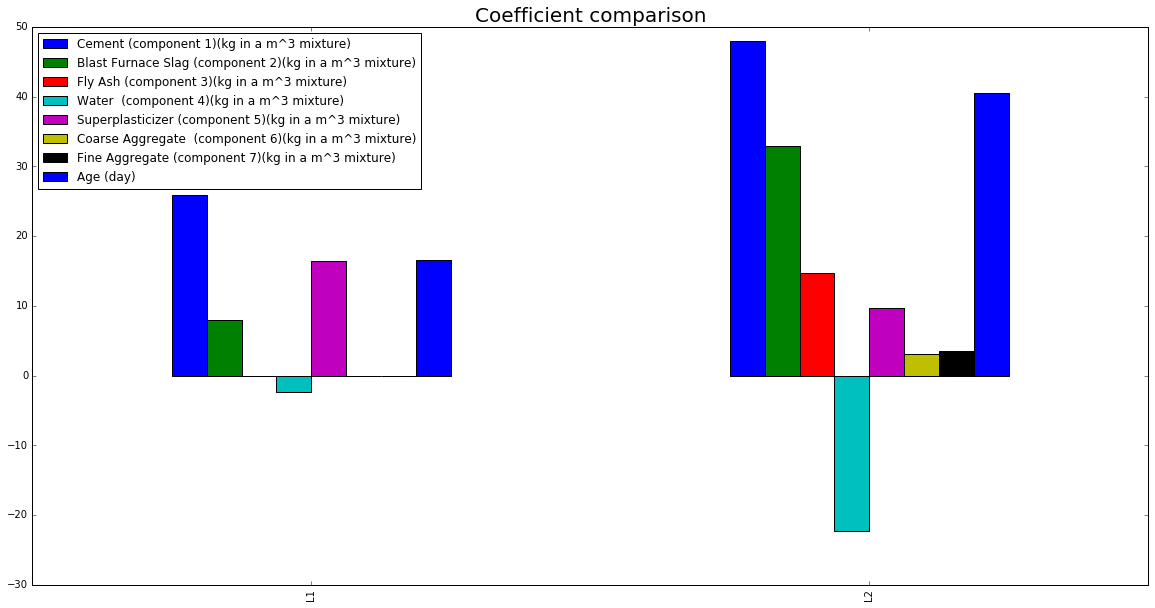

In [215]:
pd.DataFrame(np.vstack((
        lr1.coef_,
        lr2.coef_
        )), index=['L1', 'L2'], columns=X.columns).plot(kind='bar', figsize=(20,10))
plt.title('Coefficient comparison', fontsize=20)

In [7]:
import numpy as np
X = np.random.rand(10000, 1000)
X = np.hstack((X, np.ones(10000).reshape(-1,1)))
Y = np.sum(2*X, axis=1) + np.random.normal(0, 10, (10000, ))

In [14]:
from statsmodels import regression

In [ ]:
regression.linear_model.RegressionResults.rsquared_adj()

In [12]:
for i in np.arange(10, 1000):
    lr = LinearRegression()
    lr.fit(X[:,:i],Y)
    lr.coef_
    
    #regression.linear_model.RegressionResults.rsquared_adj()
    print('R2: %f' % lr.(X[:,:i],Y))


R2: 0.010344
R2: 0.010679
R2: 0.011079
R2: 0.011304
R2: 0.012587
R2: 0.013254
R2: 0.013254
R2: 0.014296
R2: 0.015104
R2: 0.015718
R2: 0.016895
R2: 0.018025
R2: 0.018485
R2: 0.019440
R2: 0.020053
R2: 0.020755
R2: 0.021825
R2: 0.021856
R2: 0.022277
R2: 0.023369
R2: 0.024623
R2: 0.025202
R2: 0.025651
R2: 0.026460
R2: 0.027767
R2: 0.029114
R2: 0.029868
R2: 0.031029
R2: 0.032217
R2: 0.032430
R2: 0.033553
R2: 0.034225
R2: 0.034727
R2: 0.035901
R2: 0.037149
R2: 0.038386
R2: 0.040445
R2: 0.041313
R2: 0.042406
R2: 0.043064
R2: 0.043671
R2: 0.045427
R2: 0.046074
R2: 0.047517
R2: 0.047870
R2: 0.048347
R2: 0.048501
R2: 0.049524
R2: 0.050261
R2: 0.051253
R2: 0.052450
R2: 0.052546
R2: 0.054016
R2: 0.054490
R2: 0.054990
R2: 0.055805
R2: 0.057275
R2: 0.058298
R2: 0.059476
R2: 0.059612
R2: 0.060555
R2: 0.062232
R2: 0.063046
R2: 0.064549
R2: 0.065852
R2: 0.066606
R2: 0.067665
R2: 0.068173
R2: 0.069068
R2: 0.069939
R2: 0.070938
R2: 0.071434
R2: 0.072090
R2: 0.072672
R2: 0.073622
R2: 0.073656
R2: 0.074270

KeyboardInterrupt: 